# 2.a

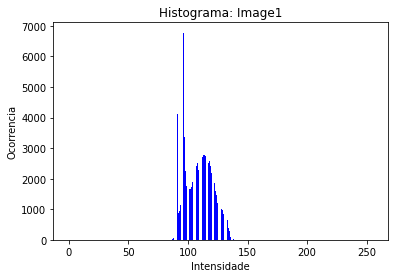

In [44]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open("lena_gray.bmp")
# img = Image.open("image1.png")
img = img.convert("L")  #Convert photo to gray scale

def getHistogram(image):
    h = [0] * 256
    for x in range(image.width):        
        for y in range(image.height): 
            i = image.getpixel((x,y))     
            h[i] += 1
    return h

h = getHistogram(img)
plt.bar(range(256), h, color = 'blue', width = 0.6)
plt.xlabel("Intensidade")
plt.ylabel("Ocorrencia")
plt.title("Histograma: Image1")
plt.show()

# plt.plot(h)
# plt.xlabel("Intensidade")
# plt.ylabel("Ocorrencia")
# plt.title("Histograma (by Pedro)")
# plt.show()


# 2.b

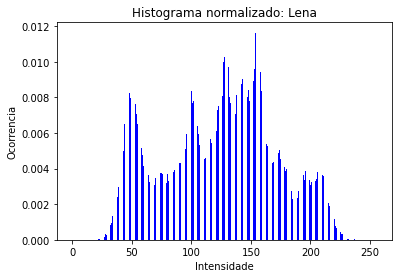

In [27]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

origem = "lena_gray.bmp"
fonte = "image1.png"
src = Image.open(origem).convert('L')
toTransform = Image.open(fonte).convert('L')


""" Função de Distribuição de Probabilidade (FDP) \n
retorna uma estimativa da probabilidade de ocorrência do nível de cinza na imagem."""
def getfdp(image, histogram): # função de distribuição de probabilidade
    fdp = [0] * 256;
    totalpixels = image.width * image.height;
    
    for i in range(256): 
        fdp[i] += histogram[i] / (totalpixels);

    return fdp

# plt.plot(getfdp(img, getHistogram(img)))
# plt.xlabel("Intensidade")
# plt.ylabel("Ocorrencia")
# plt.title("Histograma (by Pedro)")
# plt.show()

h = (getfdp(src, getHistogram(src)))
plt.bar(range(256), h, color = 'blue', width = 0.4)
plt.xlabel("Intensidade")
plt.ylabel("Ocorrencia")
plt.title("Histograma normalizado: Lena")
plt.savefig("normalizado.png")
plt.show()



# 2.c

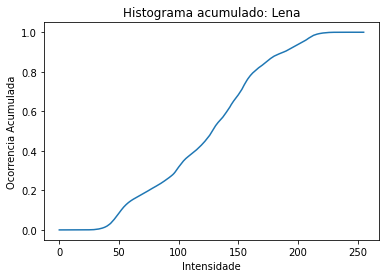

In [29]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("lena_gray.bmp")
img = img.convert("L")  #Convert photo to gray scale

def getfda(image): 
    sum = 0; fda = [0] * 256
    fdp = getfdp(image, getHistogram(image))
    for i in range(256):
        sum += fdp[i]
        fda[i] += sum 
    return fda

plt.plot(getfda(img, getHistogram(img)))
plt.xlabel("Intensidade")
plt.ylabel("Ocorrencia Acumulada")
plt.title("Histograma acumulado: Lena")
plt.savefig("acumulado.png")
plt.show()


# 3

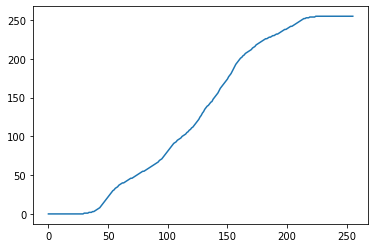

In [30]:
from PIL import Image
import matplotlib.pyplot as plt

def applyHistImage(image, histogram):
    for x in range(image.width):
        for y in range(image.height):
            newint = histogram[image.getpixel((x, y))]
            image.putpixel((x, y), newint)
    return image

def histogramEqualization(image, histogram):
    fda = getfda(image, histogram)
    for i in range(256):
        fda[i] = round(255 * fda[i])
    return fda

origem = "lena_gray.bmp"
fonte = "image1.png"
src = Image.open(origem).convert('L')
toTransform = Image.open(fonte).convert('L')

# applyHistImage(applyHistImage(img, histogramEqualization(img, getHistogram(img))), histogramEqualization(img, getHistogram(img)))
# img.save("image1_equalized_equalized.png")
# applyHistImage(img,(histogramEqualization(img, getHistogram(img))))
plt.plot(histogramEqualization(src, getHistogram(src)))
plt.show()


# 4.a

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open("image1.png")
img = img.convert("L")  #Convert photo to gray scale

def linearTransformation(image, c, b):
    for x in range(0, image.width):
        for y in range(0, image.height):
            transformation =  c * image.getpixel((x, y)) + b
            image.putpixel((x, y), transformation)
    return image

linearTransformation(img, 2, -5).save("linear/linearTrans(2,-50).png")

# 4.b

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math

img = Image.open("image1.png")
img = img.convert("L")  #Convert photo to gray scale

def logTransformation(image, c, b):
    for x in range(0, image.width):
        for y in range(0, image.height):
            transformation = c * math.log2(image.getpixel((x, y))+b)
            image.putpixel((x, y), round(transformation))
    return image

logTransformation(img, 15, 2).save("log/logTrans(15, 2).png")

# 4.c

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math

img = Image.open("image1.png")
img = img.convert("L")  #Convert photo to gray scale

def expTransformation(image, c):
    for x in range(0, image.width):
        for y in range(0, image.height):
            trans = c * math.exp(image.getpixel((x, y))+1)
            img.putpixel((x, y), round(trans))
    return image

expTransformation(img, 1/10**50).save("exp/exptrans(10^-50).png")

# 5.

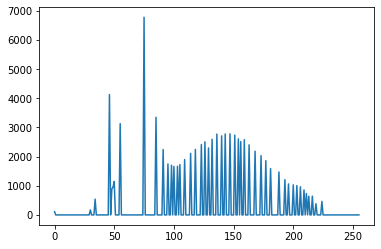

In [42]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


def applyHistImage(image, histogram):
    for x in range(image.width):
        for y in range(image.height):
            newint = histogram[image.getpixel((x, y))]
            image.putpixel((x, y), newint)
    return image

def histogramEqualization(image, histogram):
    fda = getfda(image, histogram)
    for i in range(256):
        fda[i] = round(255 * fda[i])
    return fda

def histogramSpecified(image, transf):
    LUT= [0] * 256 
    fdaimg = histogramEqualization(image, getHistogram(image))
    fdatransf = histogramEqualization(transf, getHistogram(transf))
    p_new = 0
    for i in range(256):
        while fdatransf[p_new] < fdaimg[i]:
            p_new = p_new + 1
        LUT[i] = p_new
    return LUT

fonte = "lena_gray.bmp"
origem = "image1.png"
src = Image.open(origem).convert('L')
toTransform = Image.open(fonte).convert('L')

applyHistImage(src,  histogramSpecified(src, toTransform)).save("resp.png")
plt.plot(getHistogram(applyHistImage(src,  histogramSpecified(src, toTransform))))
plt.savefig("hist.png")
